# Using Scanpy to Analyze Single-Cell Ovarian Cancer Data

## Getting Data and Import Statements

First, we need to get our data. For this project, we are analyzing an ovarian cancer single-cell RNA sequencing dataset, GSE146026. This dataset contains 12 ovarian cancer samples from two technologyies (six from 10x and size from smartseq2) that are in the form of RSEM normalized counts. These samples are all from high-grade serous carcinomas. 

They were received from the following site:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE146026

Study that uses this data (as reference): https://www.frontiersin.org/articles/10.3389/fgene.2022.823082/full

Use this link to get the precise data that we will be using (cannot upload to github because too big): https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE146026&format=file&file=GSE146026%5FIzar%5FHGSOC%5Fascites%5F10x%5Flog%2Etsv%2Egz

Once downloaded into this directory, we can access it:

In [2]:
filepath = 'GSE146026_Izar_HGSOC_ascites_10x_log.tsv'

Now, we import necessary packages for data analysis (numpy, pandas, and scanpy):

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvi

/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
Global seed set to 0
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` 

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.6.2 pandas==1.5.2 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


In [7]:
adata = sc.read_csv(filepath, delimiter = '\t', first_column_names=True, dtype = np.dtype)   

In [8]:
adata = adata[7:]

In [9]:
adata
print(adata.obs)
print(adata.var)

Empty DataFrameView
Columns: []
Index: [AL627309.1, LINC00115, SAMD11, NOC2L, HES4, ISG15, AGRN, C1orf159, TNFRSF18, TNFRSF4, SDF4, B3GALT6, UBE2J2, ACAP3, PUSL1, CPSF3L, GLTPD1, DVL1, MXRA8, AURKAIP1, CCNL2, RP4-758J18.2, MRPL20, ANKRD65, VWA1, ATAD3B, ATAD3A, SSU72, C1orf233, RP11-345P4.9, MIB2, MMP23B, CDK11B, SLC35E2B, CDK11A, NADK, GNB1, C1orf86, SKI, RER1, PEX10, PANK4, RP3-395M20.12, TNFRSF14, FAM213B, MMEL1, TPRG1L, WRAP73, SMIM1, LRRC47, CEP104, C1orf174, KCNAB2, RPL22, RNF207, ICMT, ACOT7, TNFRSF25, NOL9, ZBTB48, KLHL21, PHF13, THAP3, DNAJC11, CAMTA1, VAMP3, PER3, UTS2, TNFRSF9, PARK7, ERRFI1, RERE, ENO1, SLC2A5, GPR157, RP3-510D11.2, H6PD, SPSB1, SLC25A33, TMEM201, PIK3CD, CLSTN1, CTNNBIP1, LZIC, NMNAT1, RBP7, UBE4B, KIF1B, PGD, APITD1, DFFA, PEX14, TARDBP, SRM, EXOSC10, MTOR, UBIAD1, FBXO2, FBXO44, FBXO6, ...]

[11548 rows x 0 columns]
Empty DataFrameView
Columns: []
Index: [10x_1, 10x_2, 10x_3, 10x_4, 10x_5, 10x_6, 10x_7, 10x_8, 10x_9, 10x_10, 10x_11, 10x_12, 10x_13, 10x_1

In [25]:
adata = adata.copy().T


In [26]:
adata.X.astype(float)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 4.73944044, ..., 0.        , 2.40201497,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.55961156, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
adata.obs

Empty DataFrame
Columns: []
Index: [10x_1, 10x_2, 10x_3, 10x_4, 10x_5, 10x_6, 10x_7, 10x_8, 10x_9, 10x_10, 10x_11, 10x_12, 10x_13, 10x_14, 10x_15, 10x_16, 10x_17, 10x_18, 10x_19, 10x_20, 10x_21, 10x_22, 10x_23, 10x_24, 10x_25, 10x_26, 10x_27, 10x_28, 10x_29, 10x_30, 10x_31, 10x_32, 10x_33, 10x_34, 10x_35, 10x_36, 10x_37, 10x_38, 10x_39, 10x_40, 10x_41, 10x_42, 10x_43, 10x_44, 10x_45, 10x_46, 10x_47, 10x_48, 10x_49, 10x_50, 10x_51, 10x_52, 10x_53, 10x_54, 10x_55, 10x_56, 10x_57, 10x_58, 10x_59, 10x_60, 10x_61, 10x_62, 10x_63, 10x_64, 10x_65, 10x_66, 10x_67, 10x_68, 10x_69, 10x_70, 10x_71, 10x_72, 10x_73, 10x_74, 10x_75, 10x_76, 10x_77, 10x_78, 10x_79, 10x_80, 10x_81, 10x_82, 10x_83, 10x_84, 10x_85, 10x_86, 10x_87, 10x_88, 10x_89, 10x_90, 10x_91, 10x_92, 10x_93, 10x_94, 10x_95, 10x_96, 10x_97, 10x_98, 10x_99, 10x_100, ...]

[9609 rows x 0 columns]

## Preprocessing

We can show which genes yield the highest fraction of counts in each single cell:

normalizing counts per cell
    finished (0:00:01)


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


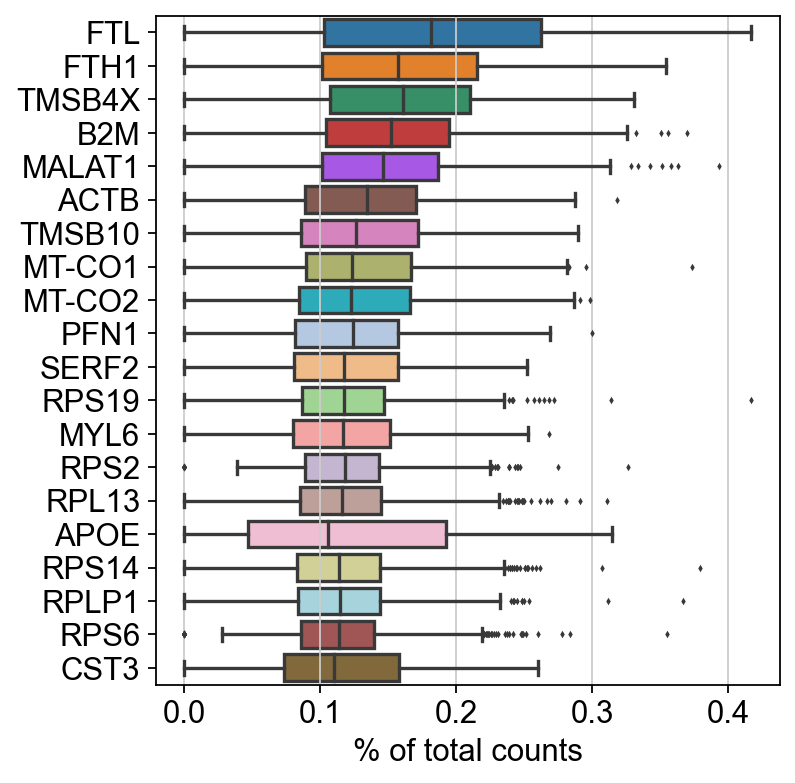

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20, )

Now, we need to filter out the genes that are detected in less than 3 cells:

In [29]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

For quality control, we need to assemble information about mitochondrial genes:
* High proportions of mitochondrial genes indicate poor-quality cells

In [30]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

A violin plot of some of the computed quality measures:

* the number of genes expressed in the count matrix
* the total counts per cell
* the percentage of counts in mitochondrial genes

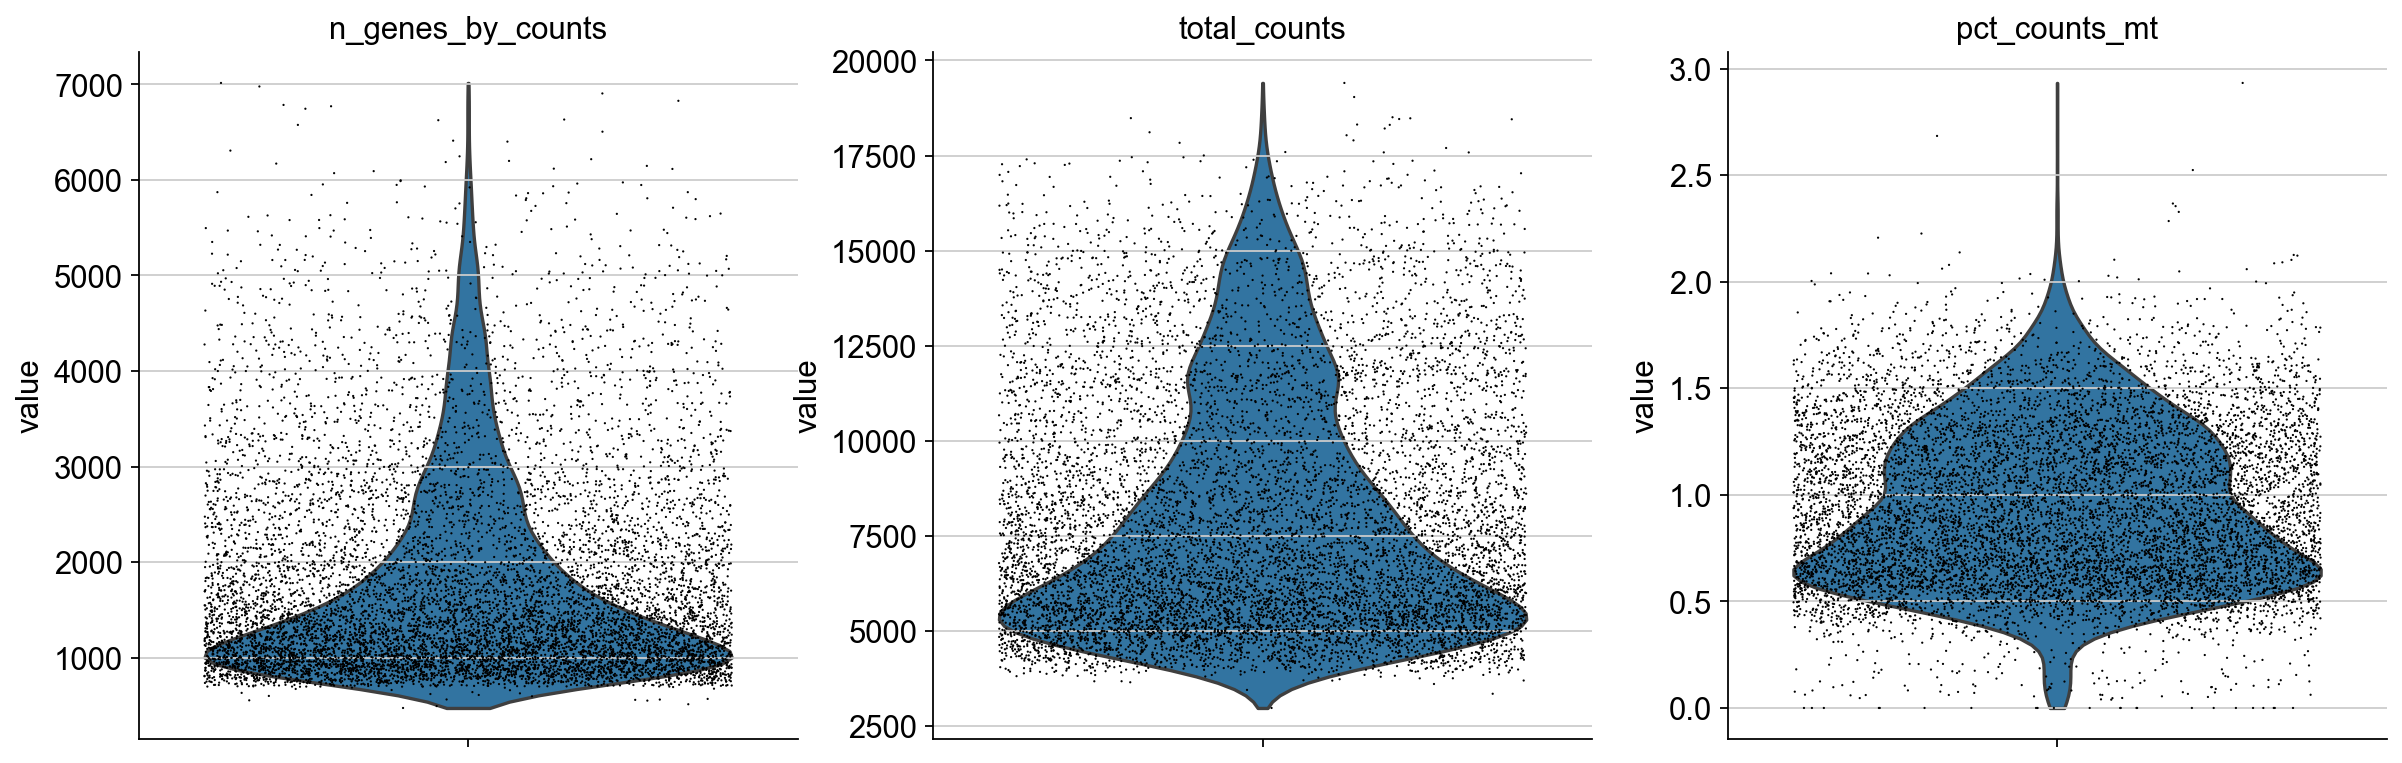

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts:

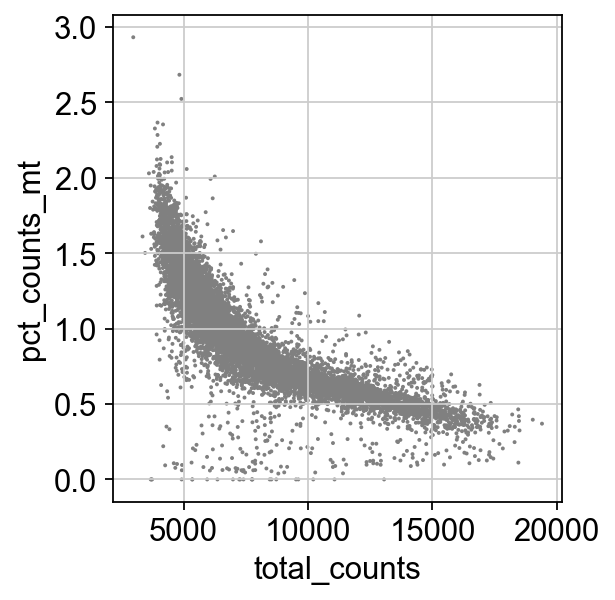

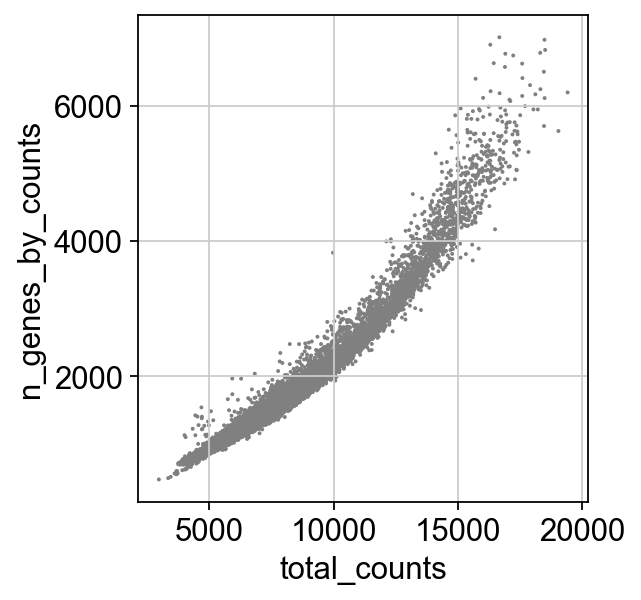

In [32]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Actually do the filtering by slicing the AnnData object.

In [33]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

As we are dealing with already normalized data, we are able to compare the read counts per cell. Next, we logarithmize the data:

In [34]:
sc.pp.log1p(adata)

/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Identify highly-variable genes:

In [35]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


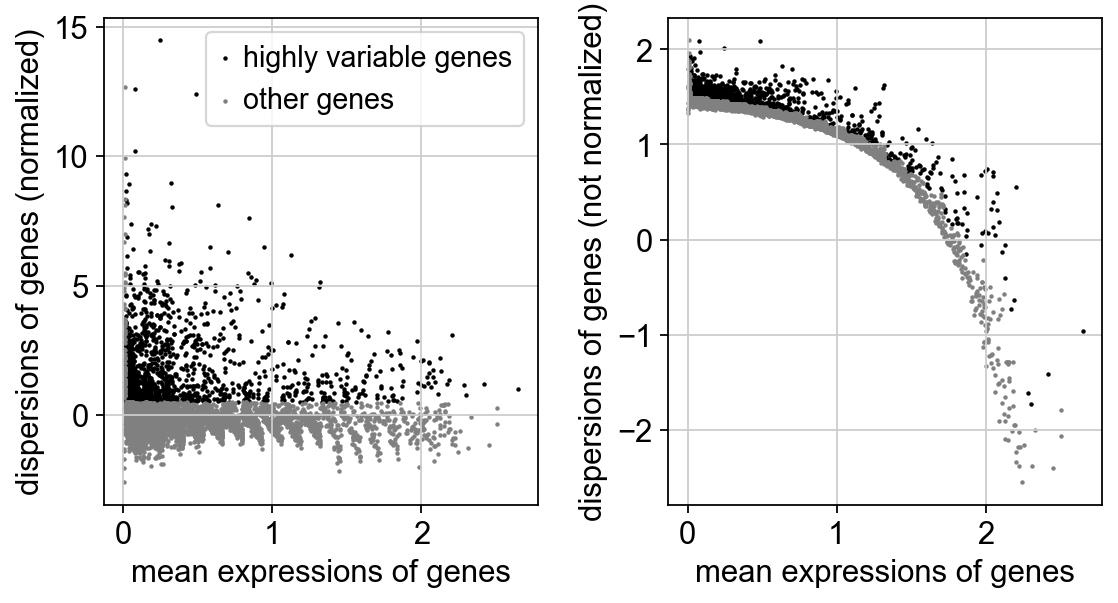

In [36]:
sc.pl.highly_variable_genes(adata)

Set the `.raw` attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

In [37]:
adata.raw = adata

In [38]:
adata = adata[:, adata.var.highly_variable]

In [39]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


    finished (0:00:18)


In [40]:
sc.pp.scale(adata, max_value=10)

## Principal Component Analysis

* This is used to reduce the dimensionality of the data, denoising the data and putting it into 2D.

* Look at different clustering functions (louvain, tSNE, etc), explain what they do.

* Check out variance ratio

* We should get *8 clusters* (macrophages, monocytes, smooth muscle cells, epithelial cells, fibroblasts, B cells, NK cells, and DC)

In [41]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


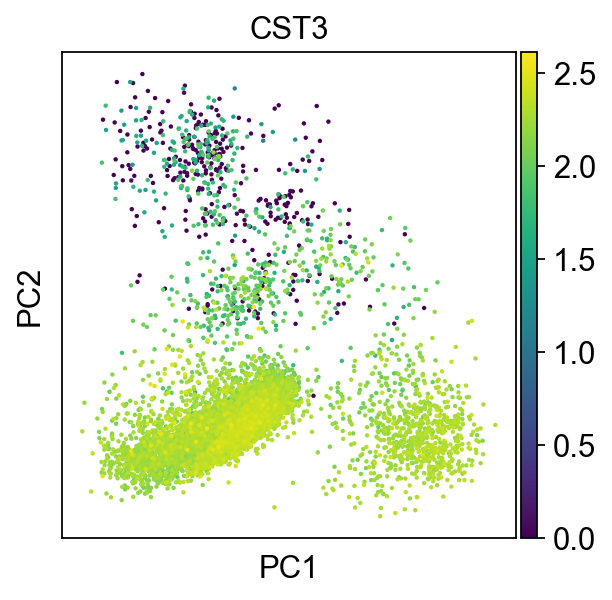

In [42]:
sc.pl.pca(adata, color='CST3')

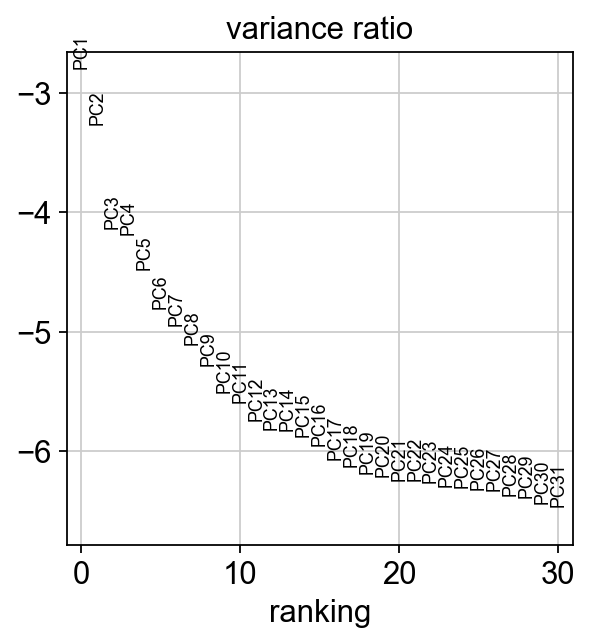

In [43]:
sc.pl.pca_variance_ratio(adata, log=True)

In [44]:
adata

AnnData object with n_obs × n_vars = 7586 × 1571
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Computing the neighborhood graph

In [45]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


## Embedding the neighborhood graph

In [46]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


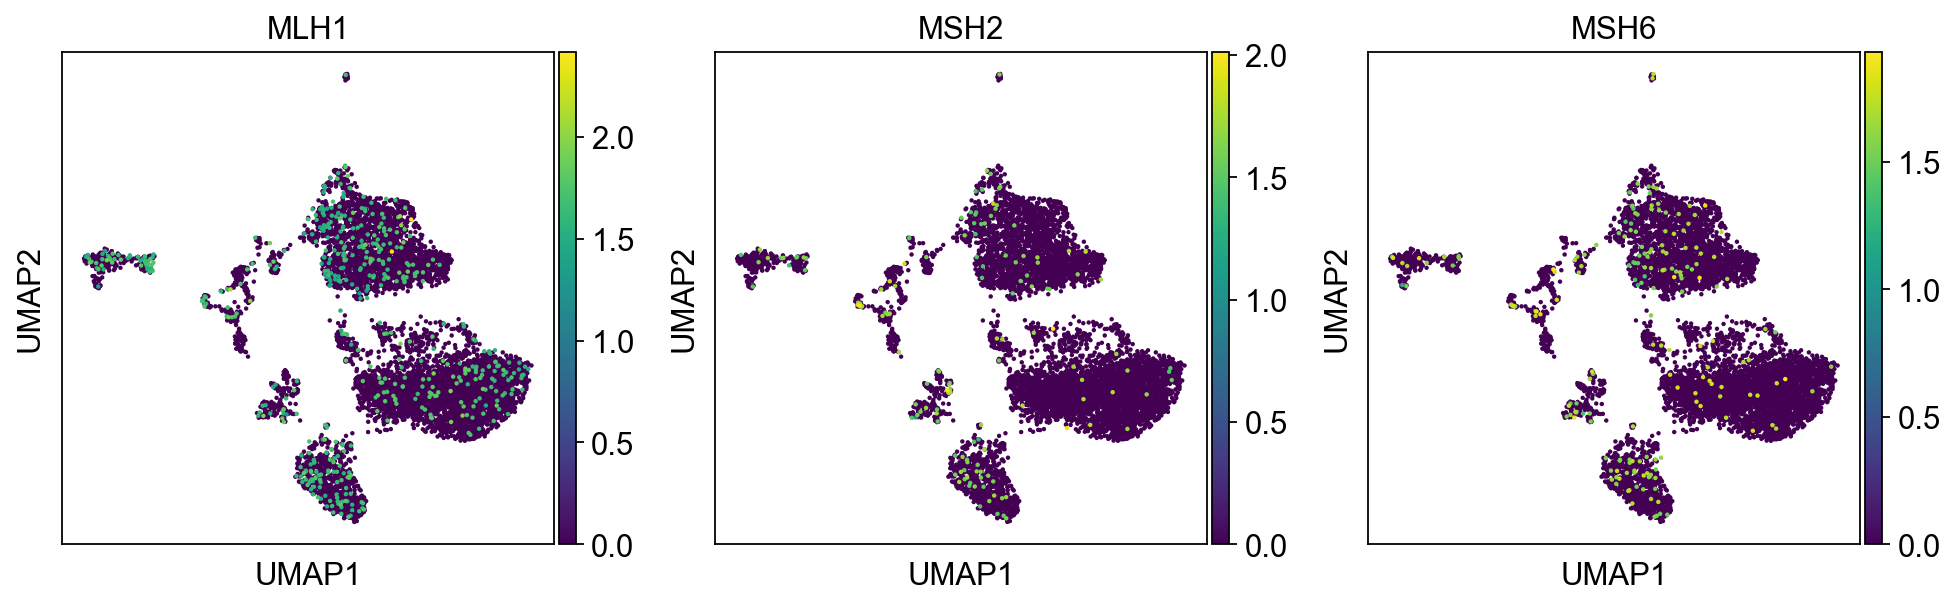

In [47]:
sc.pl.umap(adata, color=['MLH1', 'MSH2', 'MSH6'])

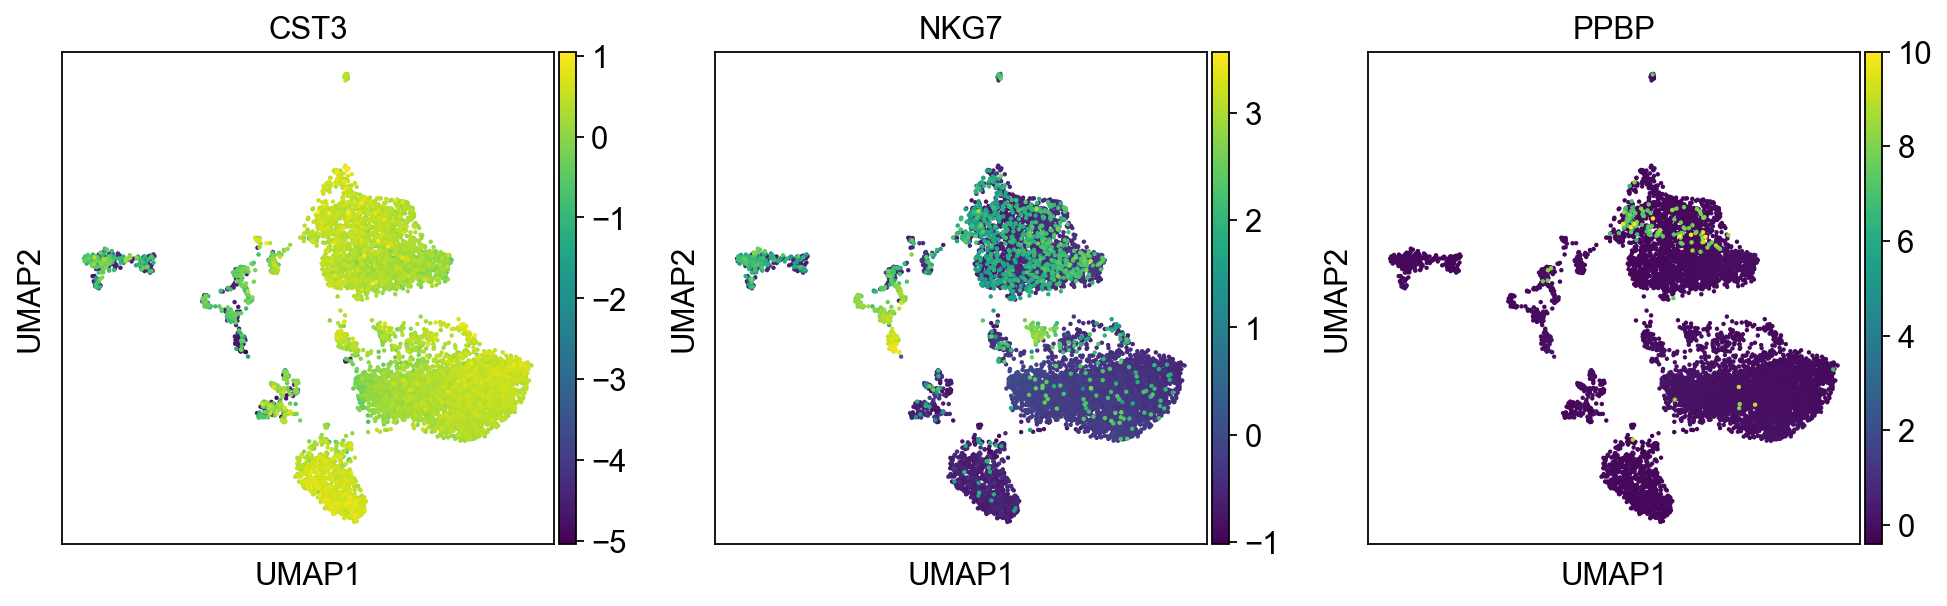

In [48]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

## Clustering - Leiden

In [49]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 0.2, key_added = "leiden_0.2")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 20 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:01)


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. P

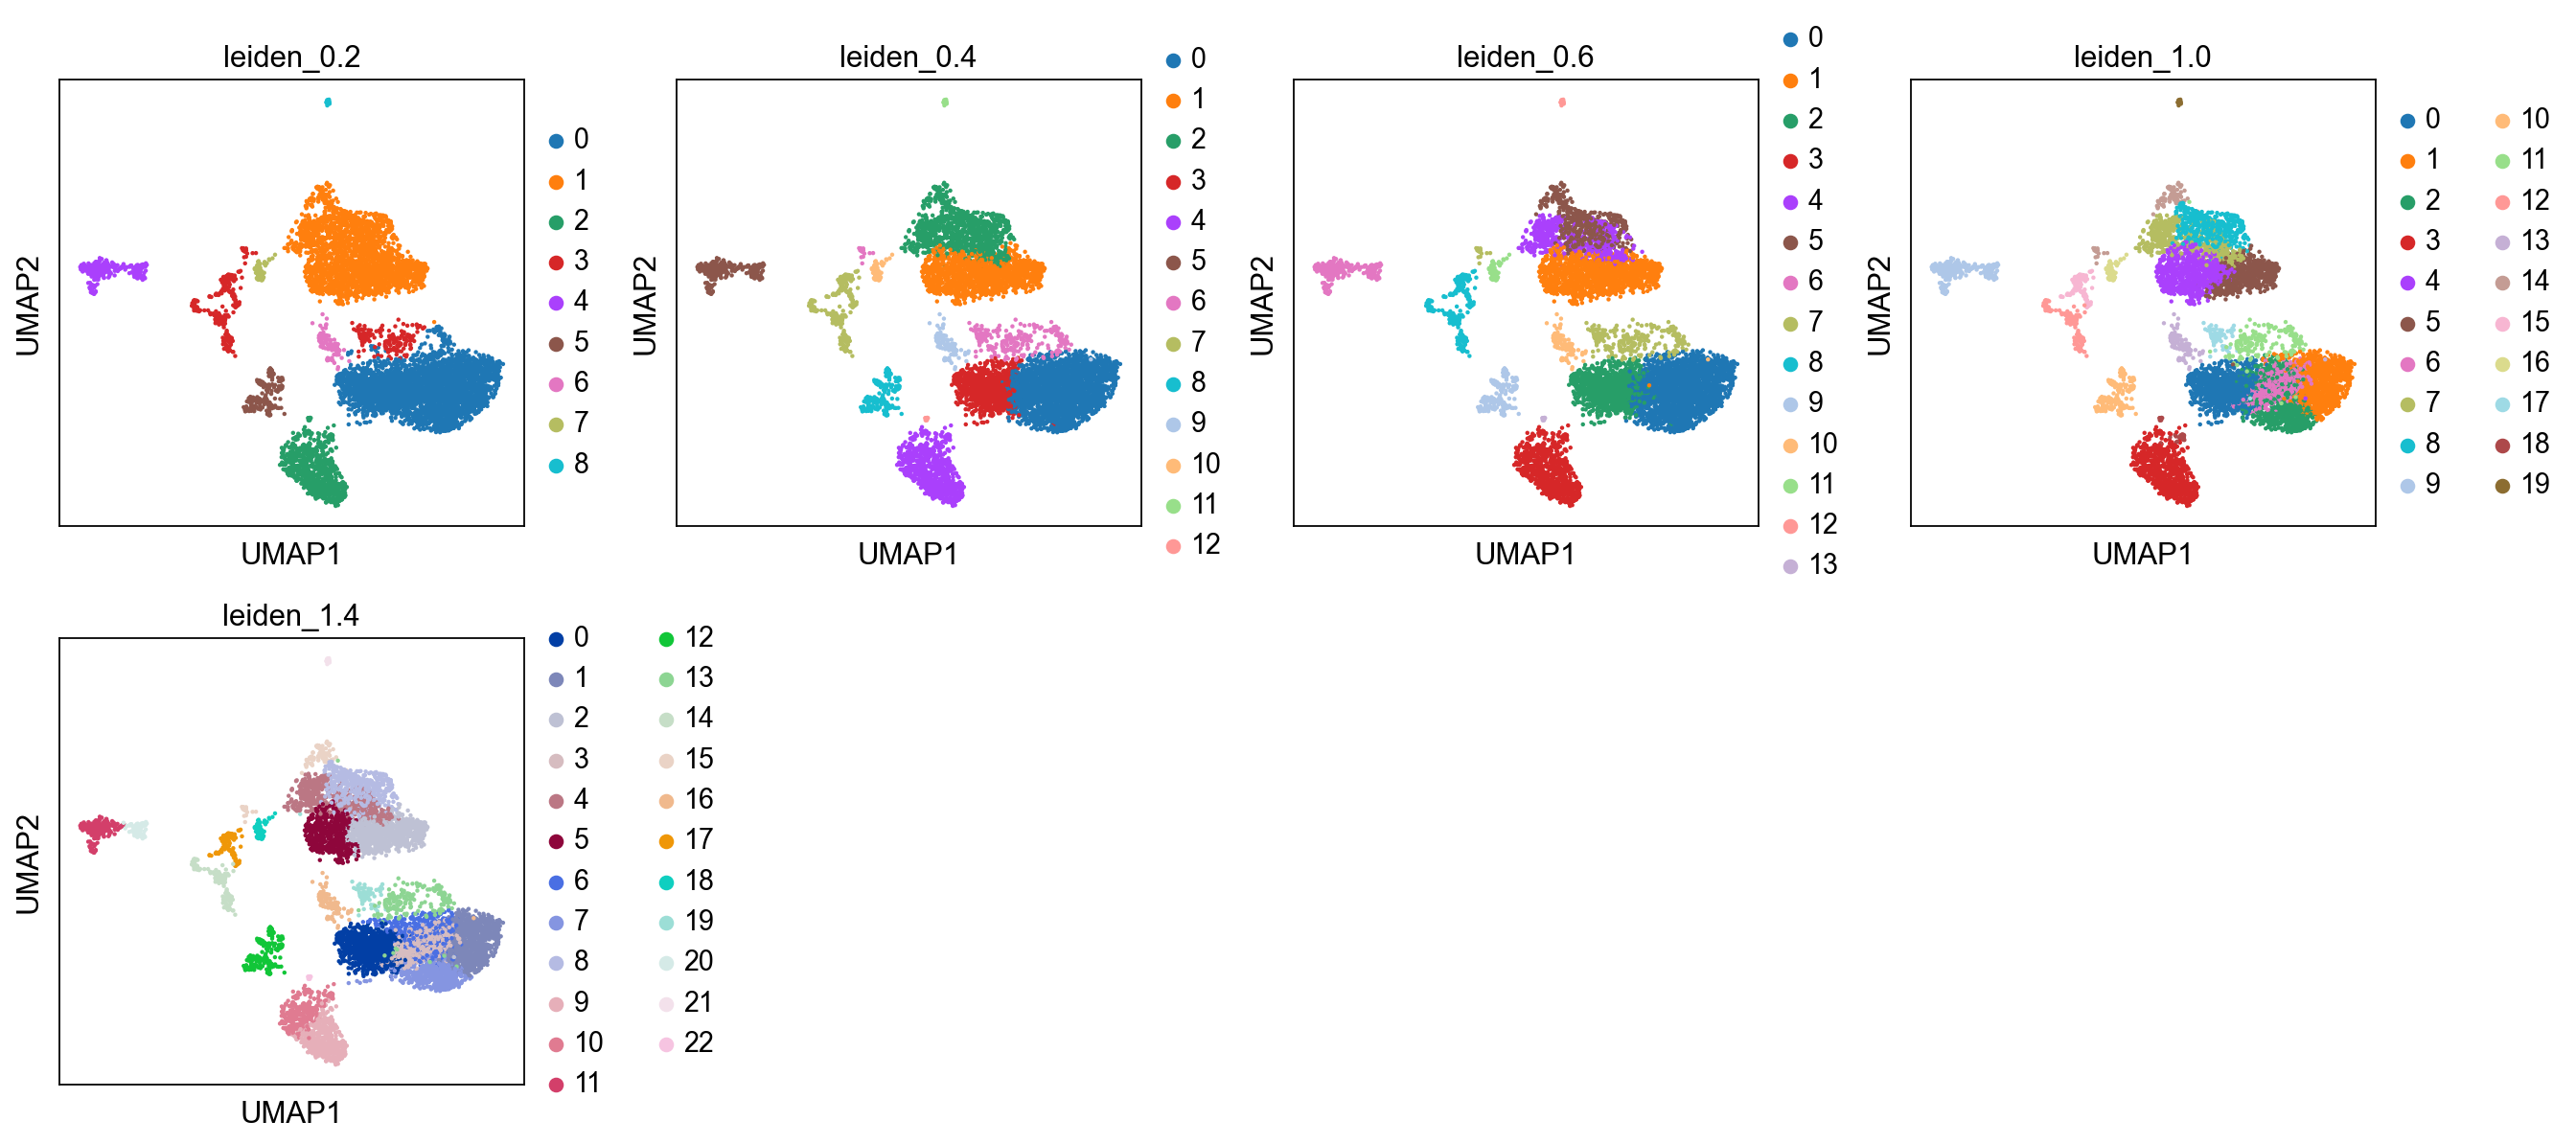

In [50]:
sc.pl.umap(adata, color=['leiden_0.2','leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

We can see that with increased resolution, we get higher granularity in the clustering. Looking at this graph, we can look further into resolution = 0.4.

We can now look further into the relationships between these clusters:

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.2']`


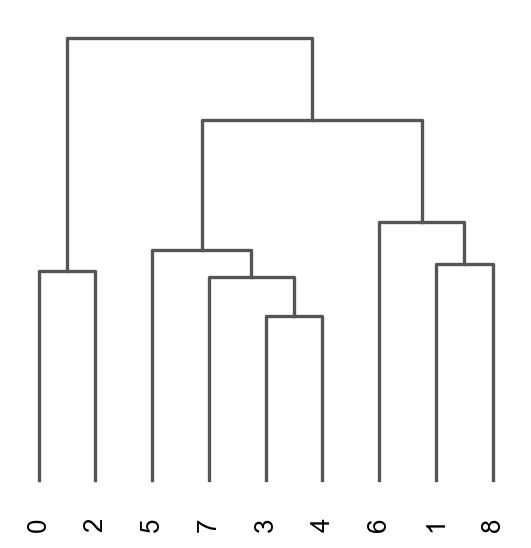

<AxesSubplot: >

In [51]:
sc.tl.dendrogram(adata, groupby = "leiden_0.2")
sc.pl.dendrogram(adata, groupby = "leiden_0.2")


## Clustering - Louvain

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. P

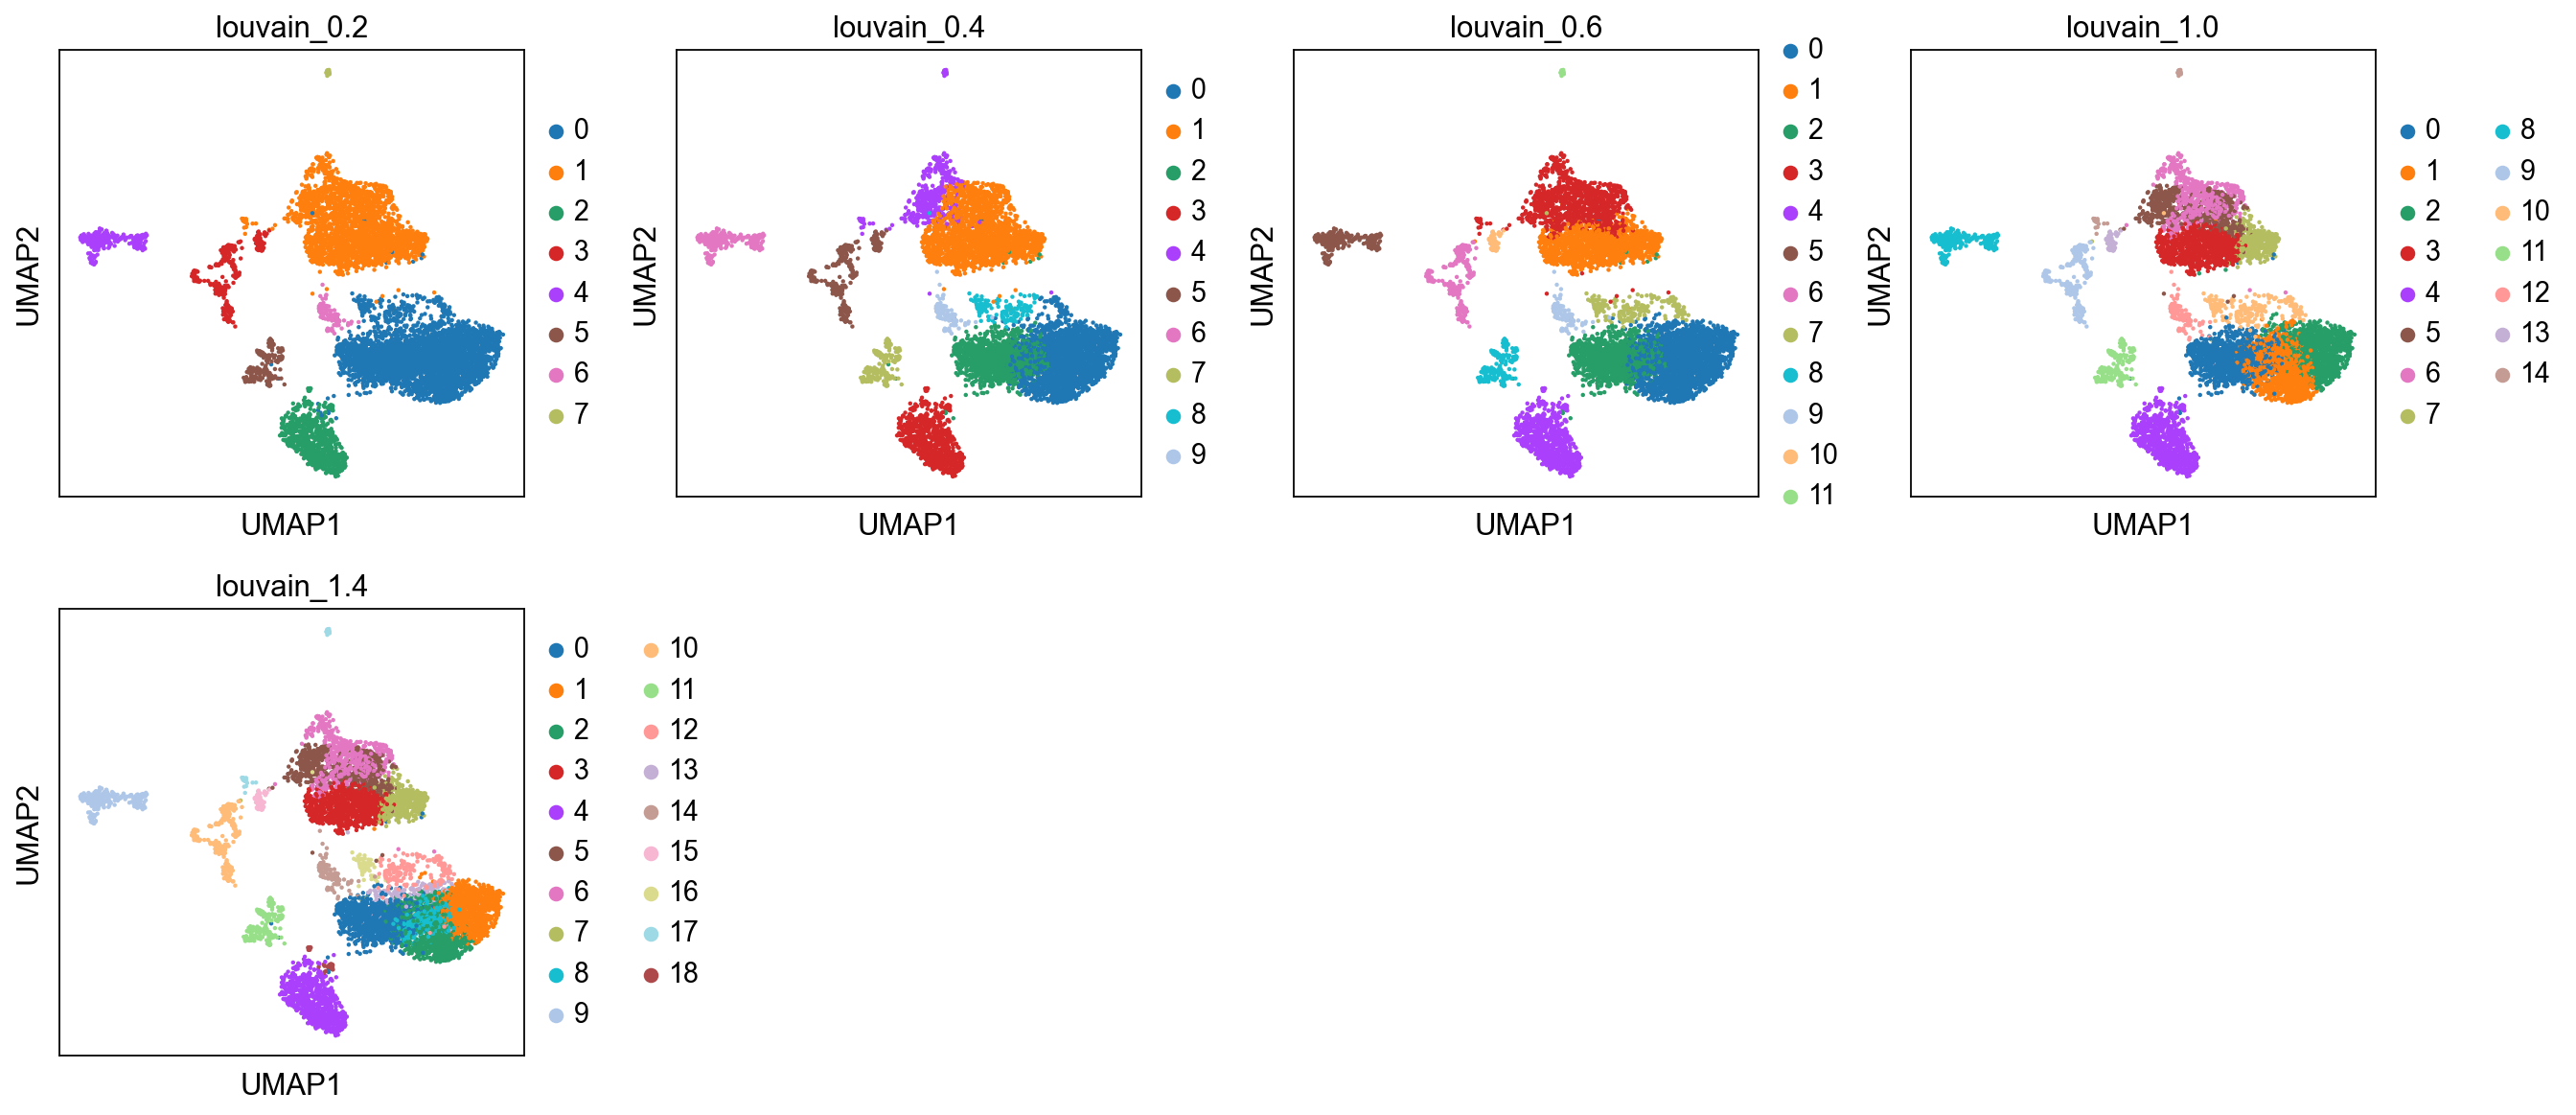

In [100]:
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 0.2, key_added = "louvain_0.2")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.2', 'louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.2']`


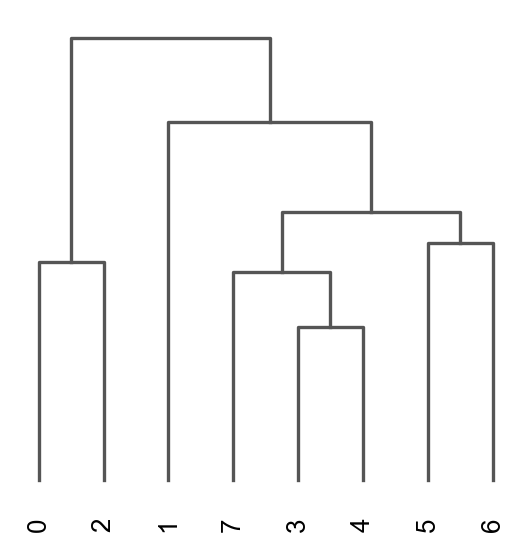

<AxesSubplot: >

In [101]:
sc.tl.dendrogram(adata, groupby = "louvain_0.2")
sc.pl.dendrogram(adata, groupby = "louvain_0.2")

## Finding marker genes

We are going to look at the expression of different genes across the clusters, in order to try and identify what types of cells make up each cluster.

ranking genes
    finished (0:00:05)


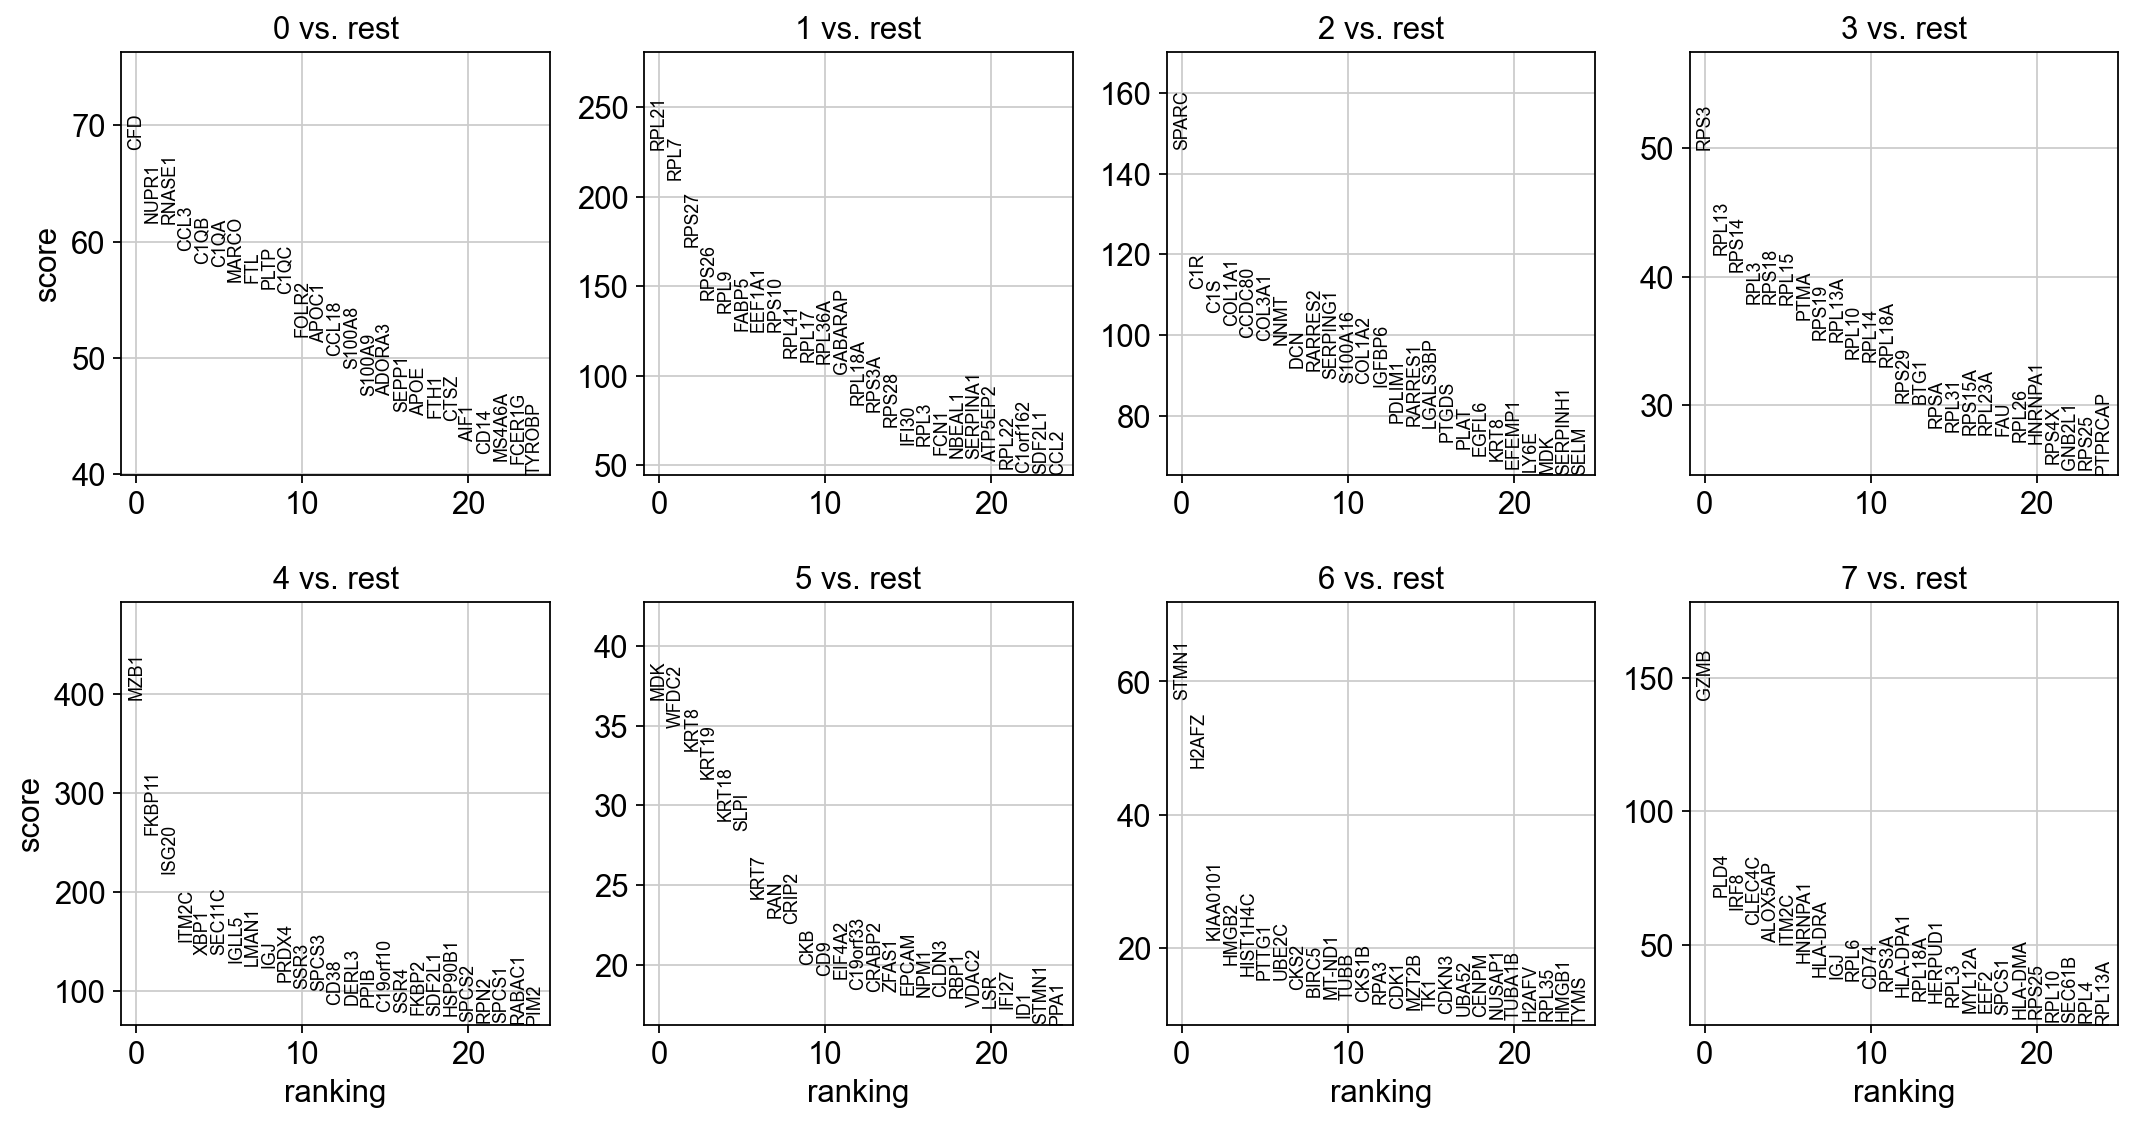

In [102]:
sc.tl.rank_genes_groups(adata, 'louvain_0.2', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [103]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0      1       2      3       4      5         6        7
0     CFD  RPL21   SPARC   RPS3    MZB1    MDK     STMN1     GZMB
1   NUPR1   RPL7     C1R  RPL13  FKBP11  WFDC2     H2AFZ     PLD4
2  RNASE1  RPS27     C1S  RPS14   ISG20   KRT8  KIAA0101     IRF8
3    CCL3  RPS26  COL1A1   RPL3   ITM2C  KRT19     HMGB2   CLEC4C
4    C1QB   RPL9  CCDC80  RPS18    XBP1  KRT18  HIST1H4C  ALOX5AP

In [104]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:11)


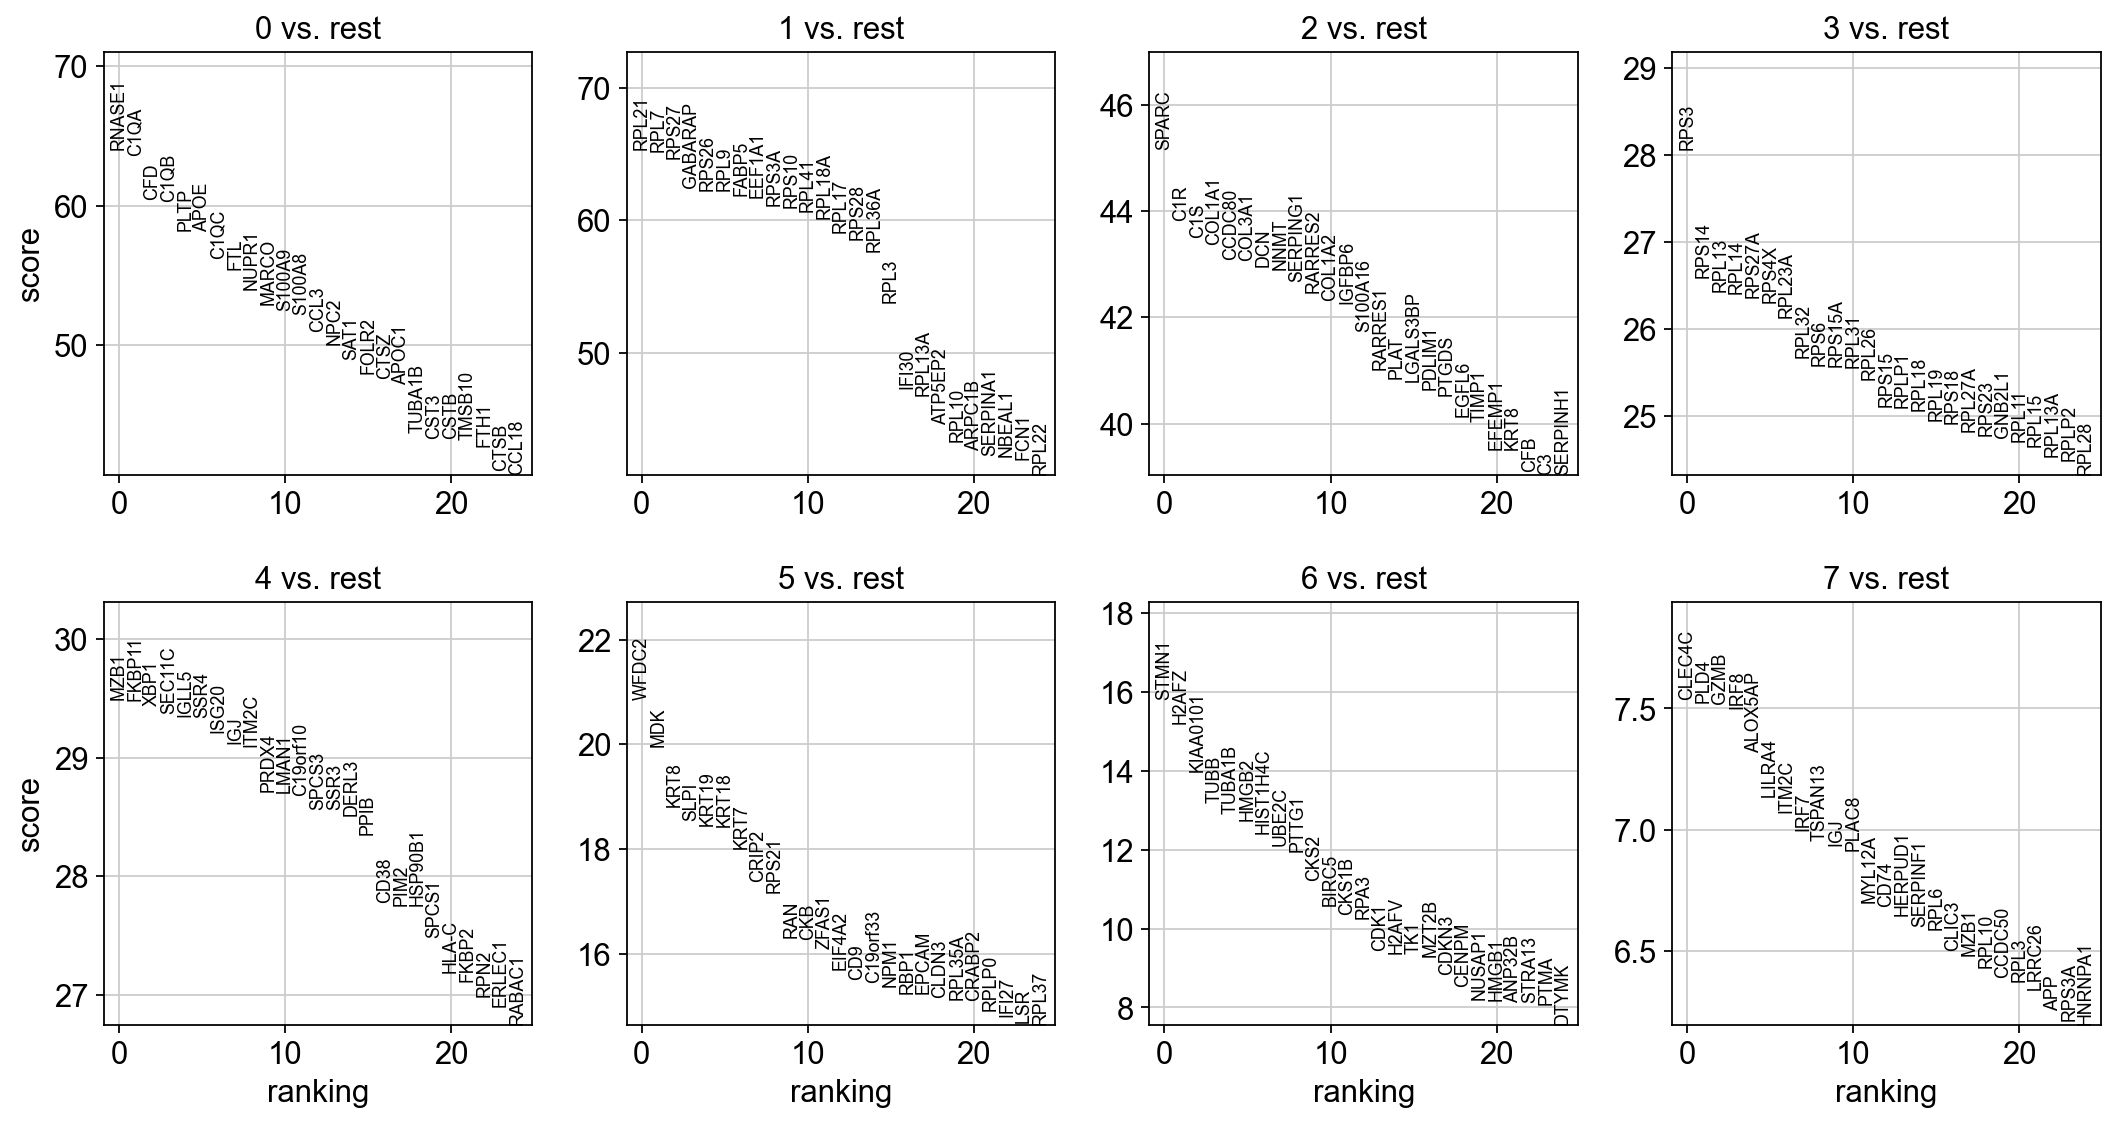

In [105]:
sc.tl.rank_genes_groups(adata, 'louvain_0.2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [106]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0        1       2       3       4      5         6        7
0  RNASE1    RPL21   SPARC    RPS3    MZB1  WFDC2     STMN1   CLEC4C
1    C1QA     RPL7     C1R   RPS14  FKBP11    MDK     H2AFZ     PLD4
2     CFD    RPS27     C1S   RPL13    XBP1   KRT8  KIAA0101     GZMB
3    C1QB  GABARAP  COL1A1   RPL14  SEC11C   SLPI      TUBB     IRF8
4    PLTP    RPS26  CCDC80  RPS27A   IGLL5  KRT19    TUBA1B  ALOX5AP

ranking genes
    finished (0:00:27)


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


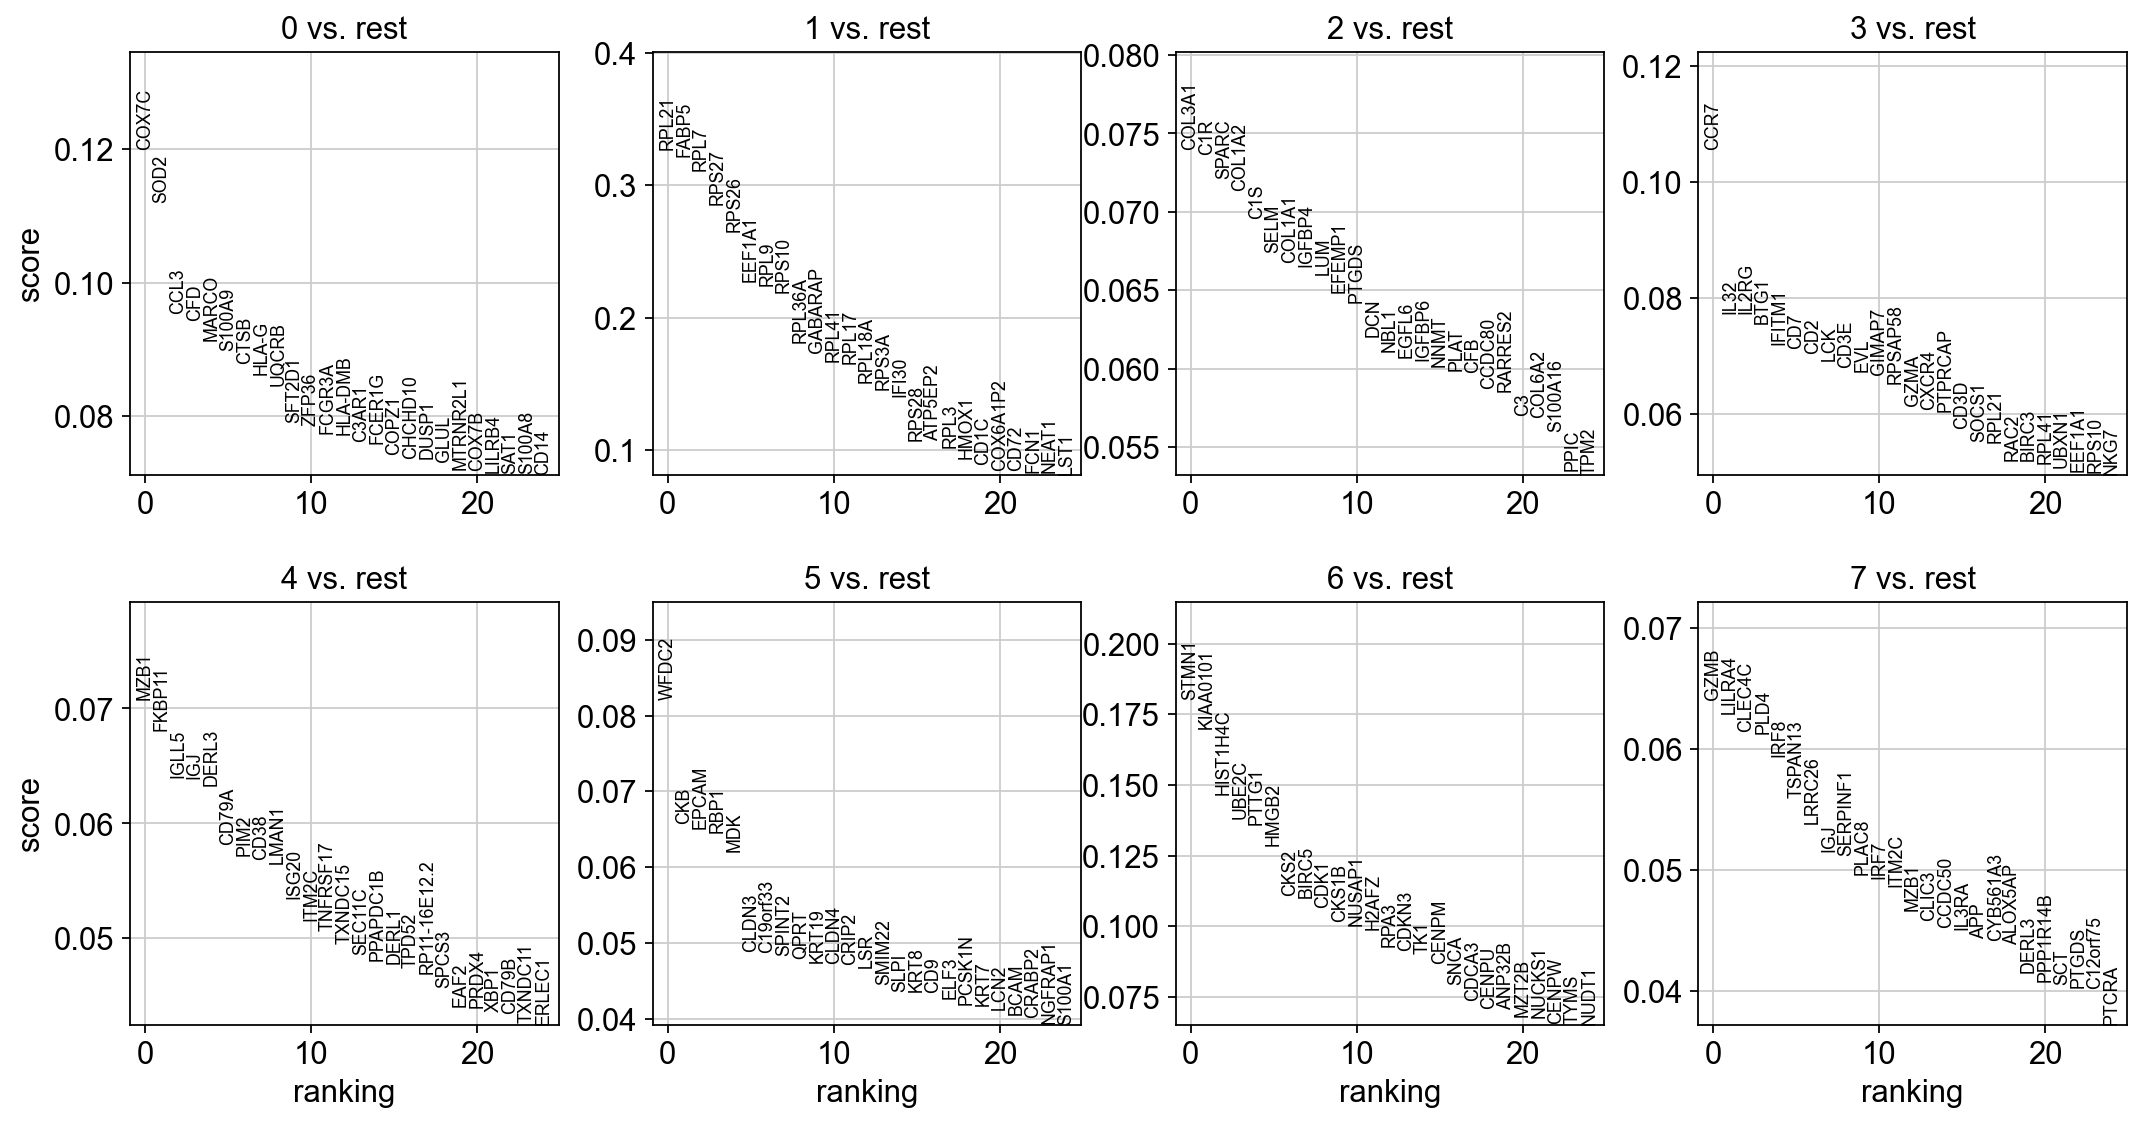

In [64]:
sc.tl.rank_genes_groups(adata, 'louvain_0.2', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [65]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0      1       2       3       4      5         6       7
0  COX7C  RPL21  COL3A1    CCR7    MZB1  WFDC2     STMN1    GZMB
1   SOD2  FABP5     C1R    IL32  FKBP11    CKB  KIAA0101  LILRA4
2   CCL3   RPL7   SPARC   IL2RG   IGLL5  EPCAM  HIST1H4C  CLEC4C
3    CFD  RPS27  COL1A2    BTG1     IGJ   RBP1     UBE2C    PLD4
4  MARCO  RPS26     C1S  IFITM1   DERL3    MDK     PTTG1    IRF8

In [107]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n  0_p      1_n  1_p     2_n  2_p     3_n            3_p     4_n  \
0  RNASE1  0.0    RPL21  0.0   SPARC  0.0    RPS3  2.379976e-173    MZB1   
1    C1QA  0.0     RPL7  0.0     C1R  0.0   RPS14  7.152024e-156  FKBP11   
2     CFD  0.0    RPS27  0.0     C1S  0.0   RPL13  5.167916e-154    XBP1   
3    C1QB  0.0  GABARAP  0.0  COL1A1  0.0   RPL14  9.137916e-154  SEC11C   
4    PLTP  0.0    RPS26  0.0  CCDC80  0.0  RPS27A  3.053402e-153   IGLL5   

             4_p    5_n           5_p       6_n           6_p      7_n  \
0  3.655314e-191  WFDC2  1.201303e-96     STMN1  2.685176e-56   CLEC4C   
1  4.660880e-191    MDK  1.142354e-88     H2AFZ  4.226702e-52     PLD4   
2  1.782396e-190   KRT8  5.473604e-79  KIAA0101  1.779830e-44     GZMB   
3  1.181996e-189   SLPI  8.864797e-77      TUBB  9.066124e-40     IRF8   
4  2.355880e-189  KRT19  5.313897e-76    TUBA1B  3.198997e-38  ALOX5AP   

            7_p  
0  4.768908e-14  
1  5.306684e-14  
2  5.362342e-14  
3  6.447514e-14  
4  2.527951e-13

Using literary knowledge and these results we can identify markers for certain cell types:

Louvain Group | Markers | Cell Type
---|---|---
0 | C1QA, C1QB, CCL3 | Macrophages
1 | FABP5 | Smooth Muscle Cells
2 | SPARC, COL1A1 |	Fibroblasts
3 | IFITMI, IL2RG |	NK Cells
4 | MZB1 | 	B Cells
5 | KRT8, KRT18, KRT19, WFDC2 |	Epithelial Cells
6 | - | 	Unknown
7 | GZMB |	Dendritic Cells

In [95]:
new_cluster_names = [
    'Macrophages', 'Smooth Muscle Cells', 'Fibroblasts', 'NK Cells', 'B Cells', 'Epithelial Cells', 'Unknown', 'Dendritic Cells']
adata.rename_categories('louvain_0.2', new_cluster_names)

/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


/Users/signehoel/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


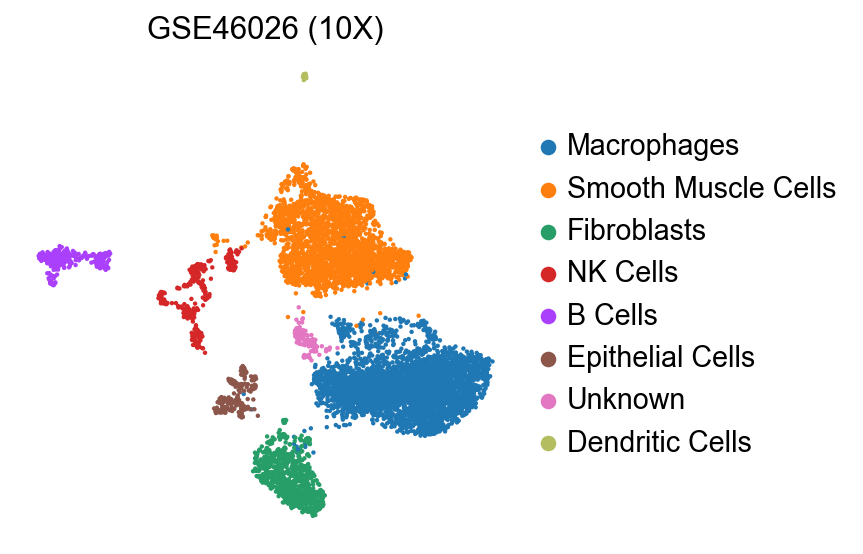

In [96]:
sc.pl.umap(adata, color='louvain_0.2', title='GSE46026 (10X)', frameon=False, save='.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.2']`


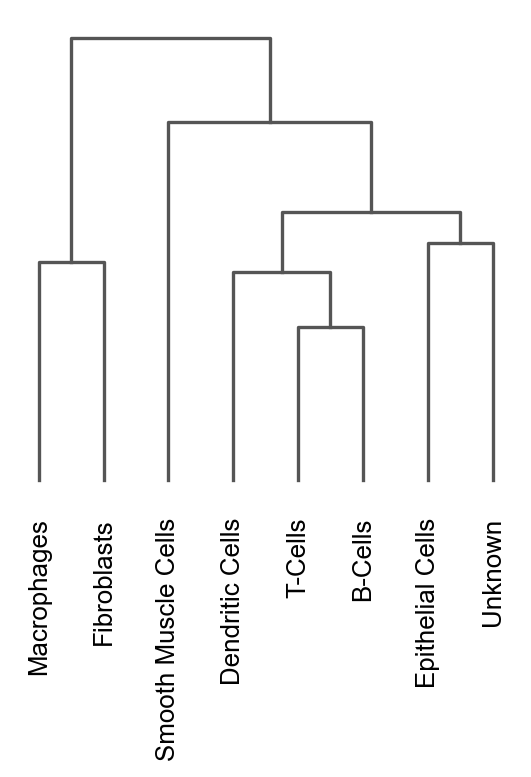

<AxesSubplot: >

In [84]:
sc.tl.dendrogram(adata, groupby = "louvain_0.2")
sc.pl.dendrogram(adata, groupby = "louvain_0.2")

In [90]:
marker_genes = ["C1QA", "C1QB", "CCL3", "FABP5", "SPARC", "COL1A1", "IFITM1", "IL2RG", "MZB1", "KRT8", "KRT18", "KRT19", "WFDC2", "GZMB"]

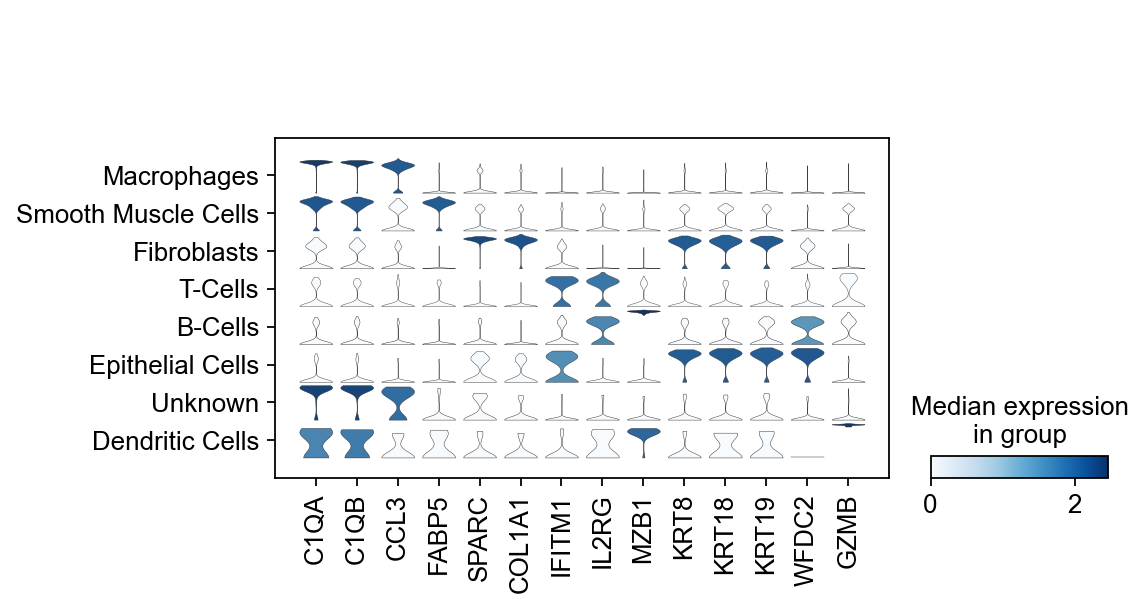

In [91]:
sc.pl.stacked_violin(adata, marker_genes, groupby='louvain_0.2', rotation=90);